In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Build the neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
istory = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 9s 8ms/step - loss: 0.2416 - accuracy: 0.9303 - val_loss: 0.1069 - val_accuracy: 0.9718
Epoch 2/10
844/844 [==============================] - 6s 8ms/step - loss: 0.0956 - accuracy: 0.9718 - val_loss: 0.0837 - val_accuracy: 0.9770
Epoch 3/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0709 - val_accuracy: 0.9787
Epoch 4/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0743 - val_accuracy: 0.9783
Epoch 5/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0758 - val_accuracy: 0.9792
Epoch 6/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0661 - val_accuracy: 0.9835
Epoch 7/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0724 - val_accuracy: 0.9828
Epoch 

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


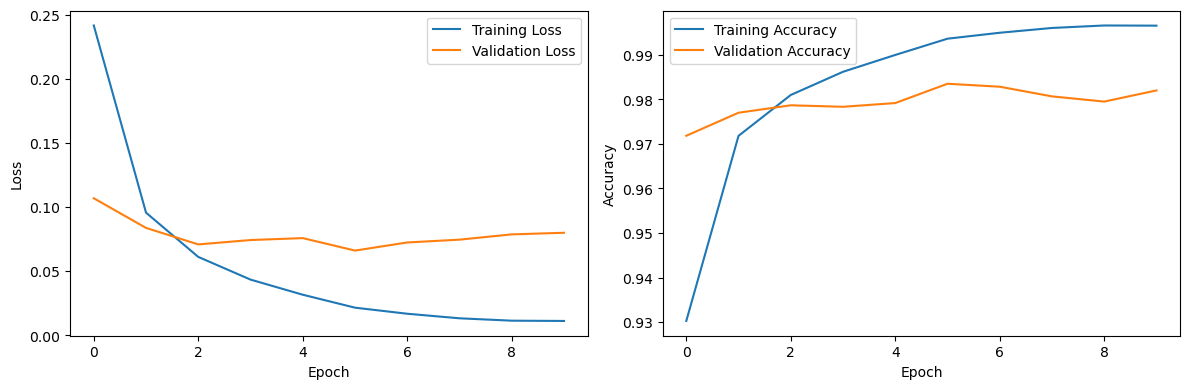

In [6]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Make predictions on a few test images
predictions = model.predict(test_images[:5])
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 406ms/step


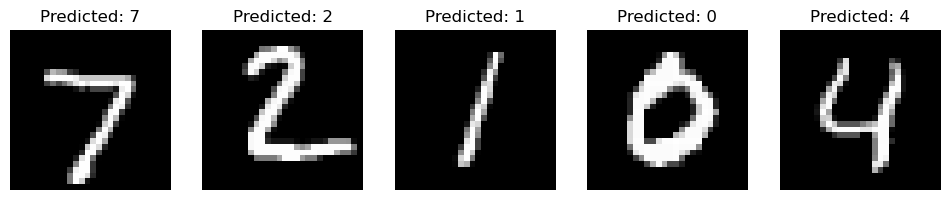

In [8]:
# Display the test images and predicted labels
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()